In [2]:
import os, math, subprocess
import datetime as dt

#data wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#excel library
import xlrd

In [3]:
#Loading data
CD = pd.read_excel('KPMG.xlsx', sheet_name= 'CustomerDemographic')
CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [5]:
#check sum of missing data
CD.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
#check duplication in dataframe
CD.duplicated().sum()

0

#Customer ID

In [7]:
CD['customer_id'].duplicated().sum()

0

In [8]:
CD['customer_id'].unique()

array([   1,    2,    3, ..., 3998, 3999, 4000], dtype=int64)

#First name and last name dupplication checking

In [9]:
CD.duplicated(subset=['first_name','last_name','gender']).sum()

1

In [10]:
CD[CD.duplicated(subset=['first_name','last_name'], keep=False)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
937,938,Corabelle,NaN,Female,18,1996-04-06,Technical Writer,Retail,Mass Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,7.0
1089,1090,Lorettalorna,NaN,Female,15,1975-07-15,Computer Systems Analyst II,Telecommunications,Affluent Customer,N,1000000000000000049861653971908893017010268485...,No,17.0
1350,1351,Lorettalorna,NaN,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,NaN,No,NaN
1904,1905,Corabelle,NaN,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


In [11]:
CD[CD.duplicated(subset=['first_name','last_name','gender'], keep=False)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
937,938,Corabelle,NaN,Female,18,1996-04-06,Technical Writer,Retail,Mass Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,7.0
1904,1905,Corabelle,NaN,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


#gender checking

In [12]:
#gender checking
CD['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [13]:
CD[CD['gender']== 'F']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0


In [14]:
CD[CD['gender']== 'Male']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,No,9.0
11,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,nil,No,8.0
12,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,-100,Yes,8.0
14,15,Erroll,Radage,Male,91,2000-07-13,Junior Executive,Manufacturing,Mass Customer,N,ð,No,1.0
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,1000000000000000049861653971908893017010268485...,Yes,18.0


In [15]:
CD[CD['gender']== 'Female']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0
13,14,Rayshell,Kitteman,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,â°â´âµ,No,6.0
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,11.0
18,19,Sorcha,Keyson,Female,76,2001-04-15,Geological Engineer,Manufacturing,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,ï¼ï¼ï¼,No,11.0
23,24,Kim,Skpsey,Female,55,1977-12-03,Research Assistant I,Argiculture,Mass Customer,N,../../../../../../../../../../../etc/hosts,Yes,15.0
25,26,Trixi,Ginnelly,Female,12,1978-06-10,Editor,Financial Services,Mass Customer,N,"<>?:""{}|_+",Yes,16.0


In [16]:
CD[CD['gender']== 'U']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN
452,453,Cornelius,Yarmouth,U,81,NaT,Assistant Professor,IT,High Net Worth,N,NaN,No,NaN
453,454,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,NaN,Yes,NaN
479,480,Darelle,Ive,U,67,NaT,Registered Nurse,Health,Mass Customer,N,NaN,Yes,NaN
512,513,Kienan,Soar,U,30,NaT,Tax Accountant,IT,Mass Customer,N,NaN,No,NaN


In [17]:
CD[CD['gender']== 'Femal']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
53,54,Loralyn,Wonfor,Femal,2,1966-07-24,Sales Associate,Property,Mass Customer,N,-0.5,Yes,18.0


In [18]:
CD[CD['gender']== 'M']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
56,57,Abba,Masedon,M,87,1988-06-13,Chief Design Engineer,NaN,Mass Customer,N,100,Yes,13.0


In [19]:
#There are 5 inputs:1x'F', 1872x'Male', 2037x'Female', 88x'U', 1x'Femal', 1x'M'
#replace 'F, Femal = Female', 'M = Male'
CD['gender'] = CD['gender'].replace(['F', 'Femal'], 'Female')
CD['gender'] = CD['gender'].replace('M','Male')
CD['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

#past_3_years_bike_related_purchases

In [49]:
#past_3_years_bike_related_purchases
CD[CD.past_3_years_bike_related_purchases == 0].head()
#There are 38 rows = 0

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
278,279,Tamera,Hinckes,Female,0,1981-09-09,Web Designer I,Manufacturing,Mass Customer,N,No,11.0
309,310,Myranda,Clowser,Female,0,1985-02-13,Account Coordinator,Financial Services,Mass Customer,N,Yes,18.0
427,428,Freida,Everil,Female,0,1977-05-03,Structural Engineer,Health,High Net Worth,N,Yes,14.0
459,460,Illa,NaN,Female,0,1986-01-23,Electrical Engineer,Manufacturing,Affluent Customer,N,Yes,16.0
474,475,Vernor,NaN,Male,0,1996-11-14,Nuclear Power Engineer,Manufacturing,Affluent Customer,N,No,1.0


DOB

In [21]:
#DOB check min,max, outlier
df_check_age = CD[['customer_id', 'first_name', 'DOB']].dropna()
df_check_age['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [22]:
df_check_age['Year'] = df_check_age['DOB'].dt.strftime('%Y')
df_check_age['Age'] = int(dt.datetime.today().strftime("%Y")) - df_check_age['Year'].astype(int)
print('min age: ', df_check_age['Age'].min())
print('max age: ', df_check_age['Age'].max())

min age:  17
max age:  176


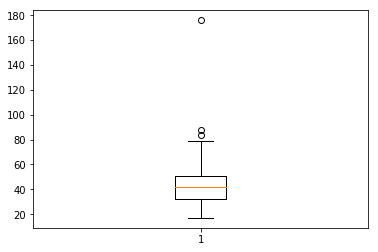

In [23]:
plt.boxplot(df_check_age['Age'])
plt.show()

In [24]:
df_check_age[df_check_age['Age']> 80]

,customer_id,first_name,DOB,Year,Age
33,34,Jephthah,1843-12-21,1843,176
719,720,Darrel,1931-10-23,1931,88
1091,1092,Katlin,1935-08-22,1935,84


In [25]:
#replace 1843 = 1943
CD['DOB'] = CD['DOB'].mask(CD['DOB'].dt.year == 1843, 
                             CD['DOB'] + pd.offsets.DateOffset(year=1943))
CD['DOB'].min()

C:\Users\My Computer\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Timestamp('1931-10-23 00:00:00')

#job_title 

In [26]:
#check most frequent title and duplication in Job tittle
df_jobtitle = CD.dropna(subset=['job_title'])
df_jobtitle['job_title'].value_counts().idxmax()

'Business Systems Development Analyst'

In [27]:
#Count max of Business Systems Development Analyst
df_jobtitle['job_title'].value_counts().max()

45

In [28]:
#Check number of job title including dupplication
df_jobtitle['job_title'].count()

3494

In [29]:
#Check number of job title excluding dupplication
df_jobtitle.job_title.drop_duplicates().count()
#There are 195 job titles

195

#job_industry_category 

In [30]:
#check dupplicate in Job_industry_category
#Drop na and check most frequent title
df_jobin = CD.dropna(subset=['job_industry_category'])
df_jobin['job_industry_category'].value_counts().idxmax()

'Manufacturing'

In [31]:
#Count max of Financial Services
df_jobin['job_industry_category'].value_counts().max()

799

In [32]:
#Check job category including dupplication
df_jobin['job_industry_category'].count()

3344

In [33]:
#Check job category excluding dupplication
df_jobin['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [34]:
#Check number of job category excluding dupplication
df_jobin.job_industry_category.drop_duplicates().count()

9

#wealth_segment 

In [35]:
#count unique values in wealth_segment
CD['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [36]:
#count most frequent item in wealth_segment
CD['wealth_segment'].value_counts().idxmax()

'Mass Customer'

In [37]:
#Count max of Mass Customer
CD['wealth_segment'].value_counts().max()

2000

In [38]:
#Checking illogcal arrangement in wealth_segment?
test3 = CD.groupby(['wealth_segment','job_industry_category'])['past_3_years_bike_related_purchases','tenure'].agg(['min', 'max', 'sum'])
test3 = test3.reset_index()
test3

wealth_segment job_industry_category  \
                                              
0   Affluent Customer           Argiculture   
1   Affluent Customer         Entertainment   
2   Affluent Customer    Financial Services   
3   Affluent Customer                Health   
4   Affluent Customer                    IT   
5   Affluent Customer         Manufacturing   
6   Affluent Customer              Property   
7   Affluent Customer                Retail   
8   Affluent Customer    Telecommunications   
9      High Net Worth           Argiculture   
10     High Net Worth         Entertainment   
11     High Net Worth    Financial Services   
12     High Net Worth                Health   
13     High Net Worth                    IT   
14     High Net Worth         Manufacturing   
15     High Net Worth              Property   
16     High Net Worth                Retail   
17     High Net Worth    Telecommunications   
18      Mass Customer           Argiculture   
19      Mass Customer         Entertainment   
20      Mass Customer    Financial Services   
21      Mass Customer                Health   
22      Mass Customer                    IT   
23      Mass Customer         Manufacturing   
24      Mass Customer              Property   
25      Mass Customer                Retail   
26      Mass Customer    Telecommunications   

   past_3_years_bike_related_purchases            tenure                
                                   min max    sum    min   max     sum  
0                                    5  97   1055    1.0  21.0   214.0  
1                                    2  99   1383    1.0  22.0   406.0  
2                                    0  99   9593    1.0  22.0  2105.0  
3                                    1  99   6908    1.0  22.0  1357.0  
4                                    1  98   2454    1.0  21.0   416.0  
5                                    0  99  11183    1.0  21.0  2343.0  
6                                    1  98   2650    1.0  22.0   580.0  
7                                    2  98   3769    1.0  22.0   848.0  
8                                    1  96    665    3.0  19.0   174.0  
9                                    6  99   2079    1.0  22.0   357.0  
10                                   7  99   1610    2.0  19.0   371.0  
11                                   0  98   9383    1.0  22.0  2155.0  
12                                   0  99   7598    1.0  22.0  1754.0  
13                                   1  96   2880    1.0  22.0   427.0  
14                                   0  99   7981    1.0  22.0  1823.0  
15                                   0  99   3628    2.0  22.0   894.0  
16                                   0  98   4545    1.0  21.0   951.0  
17                                   3  98    919    1.0  21.0   245.0  
18                                   2  99   2811    1.0  22.0   609.0  
19                                   2  99   3327    1.0  22.0   730.0  
20                                   0  99  18517    1.0  22.0  3911.0  
21                                   0  99  15548    1.0  22.0  3228.0  
22                                   0  99   5137    1.0  22.0   876.0  
23                                   0  99  20108    1.0  22.0  4259.0  
24                                   1  99   7016    1.0  22.0  1537.0  
25                                   0  99   8987    1.0  22.0  1909.0  
26                                   0  96   1660    1.0  21.0   445.0

#deceased_indicator 

In [39]:
CD['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [40]:
CD[CD.deceased_indicator == 'Y']
#There are 2 rows

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,-0.5,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,9.0


In [41]:
#Delete rows containing 'Y' in col 'deceased_indicator'
CD = CD[CD.deceased_indicator != 'Y']
CD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            3998 non-null int64
first_name                             3998 non-null object
last_name                              3873 non-null object
gender                                 3998 non-null object
past_3_years_bike_related_purchases    3998 non-null int64
DOB                                    3911 non-null datetime64[ns]
job_title                              3492 non-null object
job_industry_category                  3342 non-null object
wealth_segment                         3998 non-null object
deceased_indicator                     3998 non-null object
default                                3696 non-null object
owns_car                               3998 non-null object
tenure                                 3911 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 437.3+ KB


#default

In [42]:
#couldnt understand what it is saying

In [43]:
#delete col 'default'
CD=CD.drop(['default'], axis=1)
CD

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


#owns_car 

In [44]:
CD['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
test4 = CD.groupby(['owns_car'])['past_3_years_bike_related_purchases'].agg(['min', 'max', 'sum'])
test4 = test4.reset_index()
test4

,owns_car,min,max,sum
0,No,0,99,97373
1,Yes,0,99,98014


In [46]:
test5 = CD.groupby(['wealth_segment','owns_car'])['past_3_years_bike_related_purchases'].agg(['count','sum'])
test5 = test5.reset_index()
test5

,wealth_segment,owns_car,count,sum
0,Affluent Customer,No,468,22897
1,Affluent Customer,Yes,510,24843
2,High Net Worth,No,500,23792
3,High Net Worth,Yes,521,24489
4,Mass Customer,No,1008,50684
5,Mass Customer,Yes,991,48682


#tenure

In [50]:
#Check min&max of tenure
print('min: ', CD['tenure'].min())
print('max: ', CD['tenure'].max())

min:  1.0
max:  22.0


In [48]:
#tenure
#convert float to int
CD_tenure = CD['tenure'].dropna(0.0).astype('int64')
CD_tenure.head()

0    11
1    16
2    15
3     7
4     8
Name: tenure, dtype: int64